<a href="https://colab.research.google.com/github/adesyifa/student-spending/blob/main/student_spending_E1E122083_AdeSyifaBadarudin_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import pandas as pd

train_data = pd.read_csv("/content/student_spending (1).csv")
train_data.head()

,id,age,gender,year_in_school,major,monthly_income,financial_aid,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous,preferred_payment_method
0,0,19,Non-binary,Freshman,Psychology,958,270,5939,709,296,123,188,41,78,134,127,72,Credit/Debit Card
1,1,24,Female,Junior,Economics,1006,875,4908,557,365,85,252,74,92,226,129,68,Credit/Debit Card
2,2,24,Non-binary,Junior,Economics,734,928,3051,666,220,137,99,130,23,239,112,133,Cash
3,3,23,Female,Senior,Computer Science,617,265,4935,652,289,114,223,99,30,163,105,55,Mobile Payment App
4,4,20,Female,Senior,Computer Science,810,522,3887,825,372,168,194,48,71,88,71,104,Credit/Debit Card


In [97]:
test_data = pd.read_csv("/content/student_spending (1).csv")
test_data.head()

,id,age,gender,year_in_school,major,monthly_income,financial_aid,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous,preferred_payment_method
0,0,19,Non-binary,Freshman,Psychology,958,270,5939,709,296,123,188,41,78,134,127,72,Credit/Debit Card
1,1,24,Female,Junior,Economics,1006,875,4908,557,365,85,252,74,92,226,129,68,Credit/Debit Card
2,2,24,Non-binary,Junior,Economics,734,928,3051,666,220,137,99,130,23,239,112,133,Cash
3,3,23,Female,Senior,Computer Science,617,265,4935,652,289,114,223,99,30,163,105,55,Mobile Payment App
4,4,20,Female,Senior,Computer Science,810,522,3887,825,372,168,194,48,71,88,71,104,Credit/Debit Card


In [117]:
female_major_counts = train_data[train_data['gender'] == 'Female']['preferred_payment_method'].value_counts()
most_common_major_female = female_major_counts.idxmax()
rate_most_common_major_female = (female_major_counts.max() / len(train_data[train_data['gender'] == 'Female'])) * 100
print("Jenis transaksi yang paling sering dipakai perempuan:", most_common_major_female)
print("%siswa perempuan yang memakai jenis transaksi:", rate_most_common_major_female)

Jenis transaksi yang paling sering dipakai perempuan: Mobile Payment App
%siswa perempuan yang memakai jenis transaksi: 35.775862068965516


In [118]:
male_major_counts = train_data[train_data['gender'] == 'Male']['preferred_payment_method'].value_counts()
most_common_major_male = male_major_counts.idxmax()
rate_most_common_major_male = (male_major_counts.max() / len(train_data[train_data['gender'] == 'Male'])) * 100
print("Jenis transaksi yang paling sering dipakai perempuan:", most_common_major_male)
print("%siswa laki-laki yang memakai jenis transaksi:", rate_most_common_major_male)

Jenis transaksi yang paling sering dipakai perempuan: Credit/Debit Card
%siswa laki-laki yang memakai jenis transaksi: 35.08064516129033


In [141]:
from sklearn.ensemble import RandomForestClassifier
y = train_data["preferred_payment_method"]

features = ["age", "gender", "year_in_school", "major"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'Id': test_data['id'], 'preferred_payment_method': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [142]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier


train_data = pd.read_csv("/content/train.csv")
test_data = pd.read_csv("/content/test.csv")


features = ["age", "gender", "year_in_school", "major",]
X_train = pd.get_dummies(train_data[features])
y_train = train_data["preferred_payment_method"]


X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)


model.fit(X_train, y_train)


predictions = model.predict(X_test)

output = pd.DataFrame({'id': test_data['id'], 'preferred_payment_method': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")



Your submission was successfully saved!


In [143]:
from sklearn.metrics import accuracy_score

# Load the ground truth (actual labels) for the test set if available
ground_truth = pd.read_csv("/content/submission.csv")

# Assuming the ground truth labels are in the 'Survived' column
actual_labels = ground_truth['preferred_payment_method']

# Calculate accuracy based on the actual labels and predictions
accuracy = accuracy_score(actual_labels, predictions)
print(f"Accuracy on Test Set: {accuracy}")


Accuracy on Test Set: 1.0


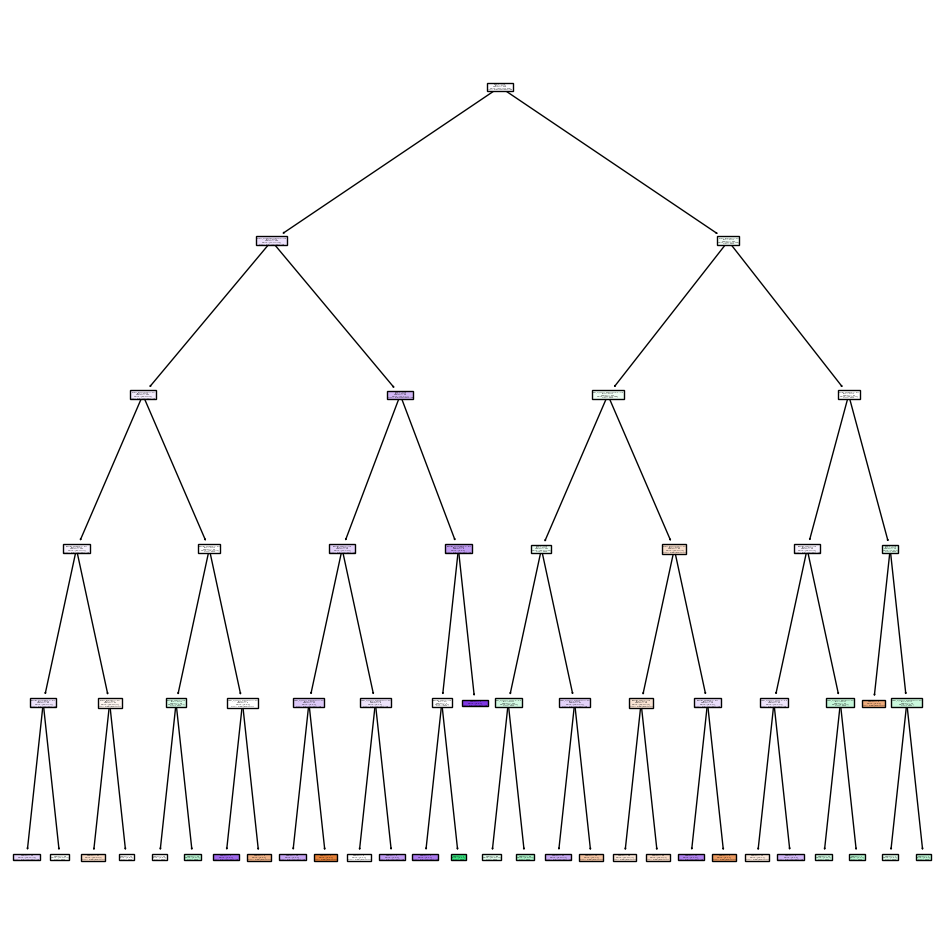

In [144]:
from sklearn import tree
import matplotlib.pyplot as plt


tree_to_visualize = model.estimators_[0]


class_names = ['Credit/Debit Card', 'Cash', 'Mobile Payment App']

plt.figure(figsize=(12, 12))
tree.plot_tree(tree_to_visualize,
               feature_names=X.columns,
               class_names=class_names,
               filled=True)
plt.savefig('random_forest_tree.png')
plt.show()


